In [1]:
import pandas as pd
import numpy as np
import os
cwd = os.getcwd()
cwd

'/home/bde/Git/Informer2020'

In [2]:
PATH = '/home/bde'
download = f'{PATH}/Data/5Gdataset-master/5G-production-dataset/Download/Driving/'
df_list = []
file_dir = download

for file in os.listdir(file_dir)[:]:
    print(file)
    df = pd.read_csv(file_dir+file)
    #print(df.head())
    
    df = df[['Timestamp', 'Speed', 'CellID', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate']]
    df = df.replace('-', np.nan)
    
    df['date'] = pd.to_datetime(df['Timestamp'], format="%Y.%m.%d_%H.%M.%S")
    df = df.drop(columns=['Timestamp'])

    df.fillna(method='ffill', inplace=True)
    #df.fillna(method='ffill', inplace=True, limit=5)
    df.fillna(0, inplace=True)

    df['CellID'] = pd.to_numeric(df['CellID'])
    
    #df['RSRP'] = pd.to_numeric(df['RSRP'], downcast='integer')
    df['RSRP'] = pd.to_numeric(df['RSRP'])
    
    df['RSRQ'] = pd.to_numeric(df['RSRQ'])
    df['SNR'] = pd.to_numeric(df['SNR'], downcast='integer')
    df['CQI'] = pd.to_numeric(df['CQI'], downcast='integer')
    df['RSSI'] = pd.to_numeric(df['RSSI'], downcast='integer')
    df['DL_bitrate'] = pd.to_numeric(df['DL_bitrate'])
    df['UL_bitrate'] = pd.to_numeric(df['UL_bitrate'])

    df.drop_duplicates(subset=['date'], inplace=True)
    df.info()
    #df.info(show_counts=True)
    #print(df.head())
    #df.plot(subplots=True, layout=(3,3), figsize=(40, 25))
    #df.to_csv('5Gdataset-{}.csv'.format(file), encoding='utf-8', index=False)
    df_list.append(df)

B_2019.12.17_07.32.39.csv
<class 'pandas.core.frame.DataFrame'>
Index: 2295 entries, 0 to 2574
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       2295 non-null   int64         
 1   CellID      2295 non-null   int64         
 2   RSRP        2295 non-null   int64         
 3   RSRQ        2295 non-null   int64         
 4   SNR         2295 non-null   int8          
 5   CQI         2295 non-null   int8          
 6   RSSI        2295 non-null   int8          
 7   DL_bitrate  2295 non-null   int64         
 8   UL_bitrate  2295 non-null   int64         
 9   date        2295 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(6), int8(3)
memory usage: 150.2 KB
B_2020.01.16_09.56.56.csv
<class 'pandas.core.frame.DataFrame'>
Index: 1536 entries, 0 to 1740
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0  

In [3]:
df = pd.concat(df_list, axis=0)
df.sort_values('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24446 entries, 0 to 857
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       24446 non-null  int64         
 1   CellID      24446 non-null  int64         
 2   RSRP        24446 non-null  int64         
 3   RSRQ        24446 non-null  int64         
 4   SNR         24446 non-null  int8          
 5   CQI         24446 non-null  int8          
 6   RSSI        24446 non-null  int8          
 7   DL_bitrate  24446 non-null  int64         
 8   UL_bitrate  24446 non-null  int64         
 9   date        24446 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(6), int8(3)
memory usage: 1.6 MB


In [4]:
df.head()

,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,date
0,0,12,-99,-15,6,12,-90,7,1,2019-12-14 10:16:30
1,1,12,-99,-15,6,12,-90,7,1,2019-12-14 10:16:31
3,1,12,-102,-14,6,12,-90,0,0,2019-12-14 10:16:32
4,1,12,-102,-14,6,12,-90,9,12,2019-12-14 10:16:33
5,1,12,-102,-14,4,12,-90,0,0,2019-12-14 10:16:34


In [5]:
df = df[['date', 'Speed', 'CellID', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24446 entries, 0 to 857
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        24446 non-null  datetime64[ns]
 1   Speed       24446 non-null  int64         
 2   CellID      24446 non-null  int64         
 3   RSRP        24446 non-null  int64         
 4   RSRQ        24446 non-null  int64         
 5   SNR         24446 non-null  int8          
 6   CQI         24446 non-null  int8          
 7   RSSI        24446 non-null  int8          
 8   DL_bitrate  24446 non-null  int64         
 9   UL_bitrate  24446 non-null  int64         
dtypes: datetime64[ns](1), int64(6), int8(3)
memory usage: 1.6 MB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
def multi_corr(feature):
    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)

    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

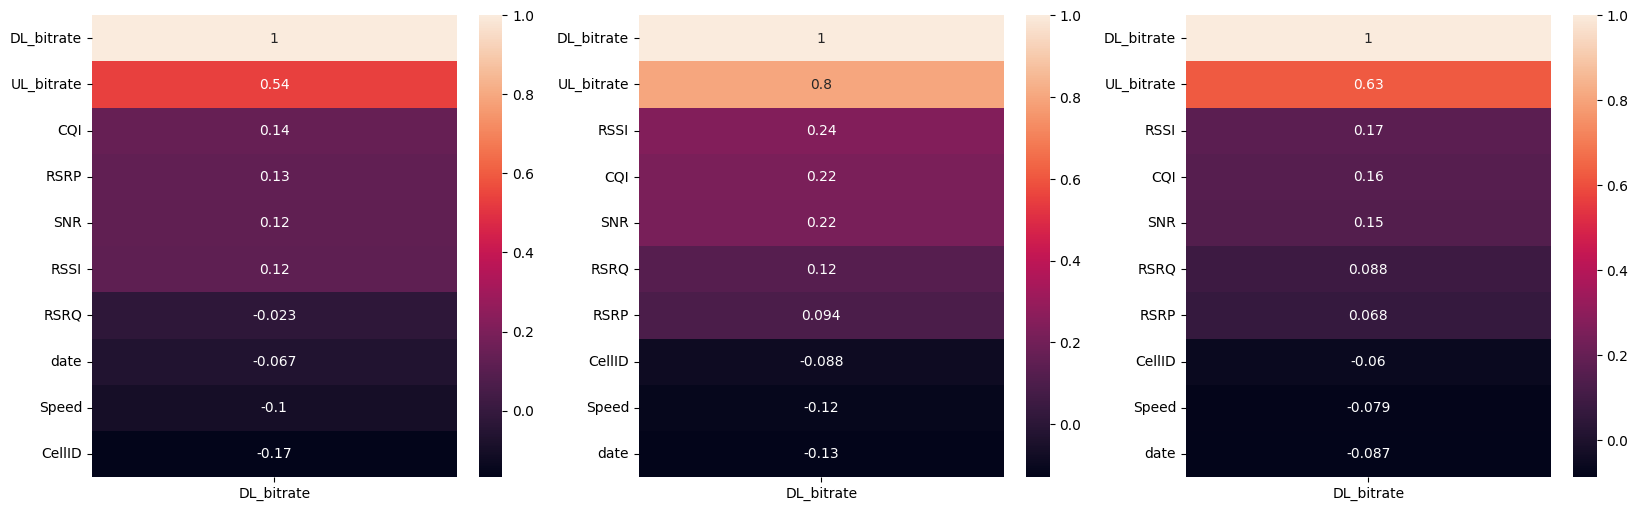

In [8]:
multi_corr('DL_bitrate')

In [9]:
df.to_csv('data/5Gdataset/download.csv', encoding='utf-8', index=False)

In [10]:
# number of changes in values
(df != df.shift(axis=0)).sum(axis=0)

date          24446
Speed          1498
CellID          699
RSRP           9295
RSRQ           7918
SNR            9213
CQI            7715
RSSI           8450
DL_bitrate    22631
UL_bitrate    22262
dtype: int64